In [19]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [2]:
PATH = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
AI_Ready_Path = '/home/disk/orca/adaley17/MLGEO2024_TC_Tracks_Intensity/data/ai_ready/'
ai_ready_file = 'ai_ready_SHIPS_data.csv'

ai_ready_data = pd.read_csv(PATH + ai_ready_file)

In [3]:
ai_ready_data.head()

,Original_Times,Original_Lat,Original_Lon,Original_WSPD,Original_Pres,Name,Code,Times,Latitude,Longitude,Vmax,MSLP,Nature,Delta_Intensity,Daily_SST_Avg,Mid_Level_RH,Vshear,Vert_Vel
0,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,-6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,0.0,21.7,87.1,10.28888,1005.0,1.0,0.0,27.1,57.0,15.227542,6.631183
3,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,6.0,22.2,86.5,12.86110,1004.0,0.0,5.0,27.8,53.0,15.536209,3.966363
4,1982-06-02 12:00:00,21.7,87.1,10.28888,1005.0,ALBE,AL011982,12.0,22.6,85.8,15.43332,1003.0,0.0,10.0,27.9,56.0,15.330431,4.403641


In [11]:
scaler = StandardScaler()
storm_data = scaler.fit_transform(ai_ready_data.drop(columns=['Times', 'Code', 'Original_Times', 
                                                 'Nature', 'Name', 'Original_Lat', 'Original_Lon', 
                                                 'Original_WSPD', 'Original_Pres',]))

## Apply PCA on majority of the dataset

Explained variance ratio: [0.34409623 0.23264807]


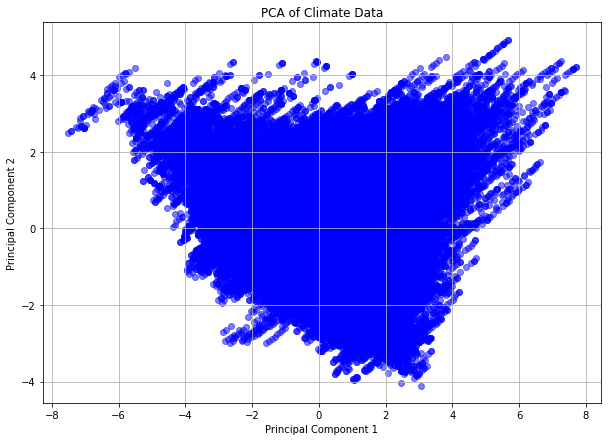

In [18]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
storm_data = storm_data[~np.isnan(storm_data).any(axis=1)]
storm_data_pca = pca.fit_transform(storm_data)

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(storm_data_pca[:, 0], storm_data_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

## Apply PCA on the following Data that is relevant for Intensity

'Daily_SST_Avg', 'Mid_Level_RH', 'Vert_Vel', 'Vshear', 'MSLP', 'Vmax',

Explained variance ratio: [0.5529496  0.33531117]


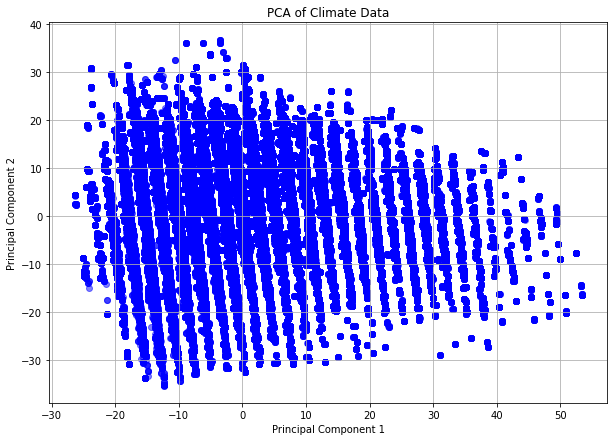

In [38]:
# Select the columns to keep
columns_to_keep = ['Daily_SST_Avg', 'Mid_Level_RH', 'Vert_Vel', 'Vshear', 'MSLP', 'Vmax']

# Filter the storm_data to keep only the specified columns
intensity_data_filtered = ai_ready_data[columns_to_keep]

intensity_pca = pca.fit_transform(intensity_data_filtered.dropna())

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(intensity_pca[:, 0], intensity_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

Explained variance ratio: [0.77143471 0.16620711]


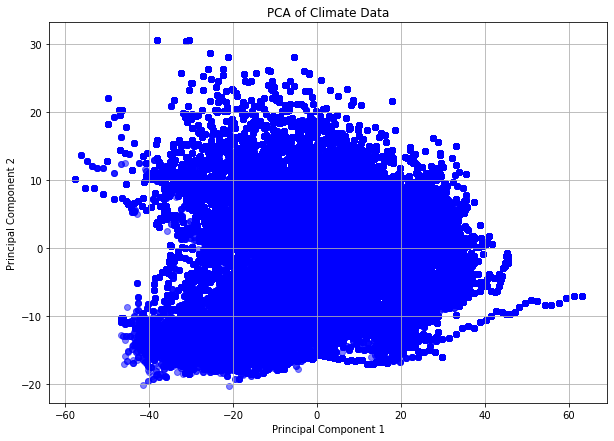

In [37]:
# Select the columns to keep
columns_to_keep = ['Longitude', 'Latitude', 'Vshear']

# Filter the storm_data to keep only the specified columns
track_data_filtered = ai_ready_data[columns_to_keep]

track_pca = pca.fit_transform(track_data_filtered.dropna())

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(track_pca[:, 0], track_pca[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Climate Data')
plt.grid(True)
plt.show()

In [31]:
storm_data_pca

array([[-26.53871093,  -4.10419636],
       [-24.41253362,   0.20514222],
       [-22.06931838,  -2.7088763 ],
       ...,
       [-16.31023674,  -1.91586633],
       [-20.20808061,  -4.61121108],
       [-20.20808061,  -4.61121108]])

In [29]:
storm_data_pca

array([[23.36340522, -3.21053632],
       [22.74646046, -2.64753646],
       [22.05455842, -2.36085805],
       ...,
       [20.84266463,  5.37477884],
       [20.72351279,  8.0412254 ],
       [20.72351279,  8.0412254 ]])

/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


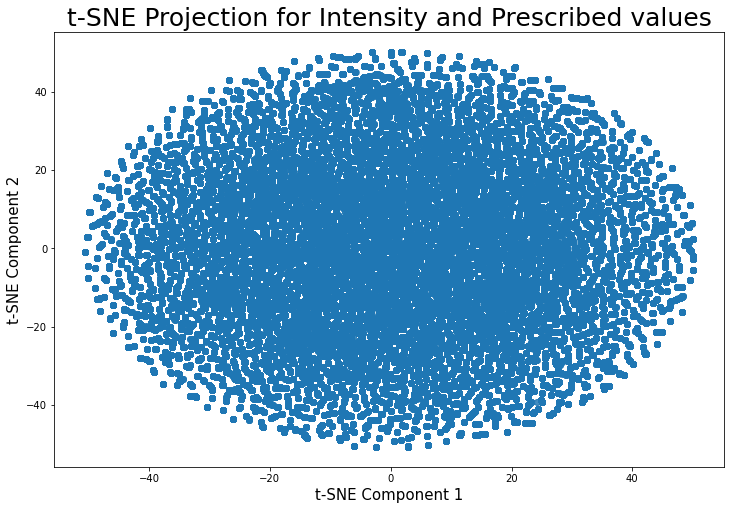

In [39]:
tsne = TSNE(n_components=2, random_state=42)
tsne_intensity_result = tsne.fit_transform(intensity_data_filtered.dropna())


# Plot the t-SNE result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_intensity_result[:, 0], tsne_intensity_result[:, 1], alpha=0.6)

plt.title('t-SNE Projection for Intensity and Prescribed values',fontsize=25)
plt.xlabel('t-SNE Component 1',fontsize=15)
plt.ylabel('t-SNE Component 2',fontsize=15)
plt.show()



/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/disk/orca/adaley17/anaconda3/envs/waves/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


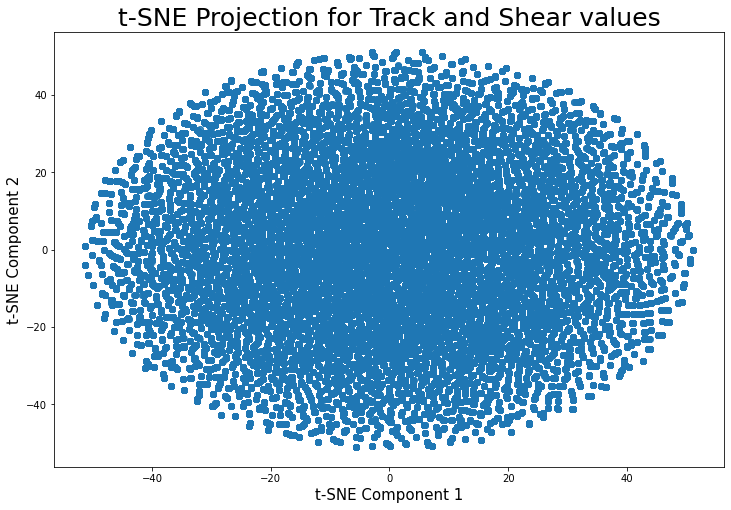

In [40]:
tsne = TSNE(n_components=2, random_state=42)
tsne_track_result = tsne.fit_transform(track_data_filtered.dropna())


# Plot the t-SNE result with the custom colormap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_track_result[:, 0], tsne_track_result[:, 1], alpha=0.6)

plt.title('t-SNE Projection for Track and Shear values',fontsize=25)
plt.xlabel('t-SNE Component 1',fontsize=15)
plt.ylabel('t-SNE Component 2',fontsize=15)
plt.show()